# Who is eligible for loan

In [1]:
# Import library pandas
import pandas as pd

# Import training data as train
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")

# Import testing data as test
test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")

In [2]:
# Print top 5 observation of training dataset
print (train.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
# Store total number of observation in training dataset
train_length =len(train)

# Store total number of columns in testing data set
test_col = len(test.columns)

# Understanding Data

In [4]:
# Look at the summary of numerical variables for train data set
df= train.describe()
print (df)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [5]:
# Print the unique values and their frequency of variable Property_Area
df1=train['Property_Area'].value_counts()
print (df1)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


# Understanding distribution of numerical variables

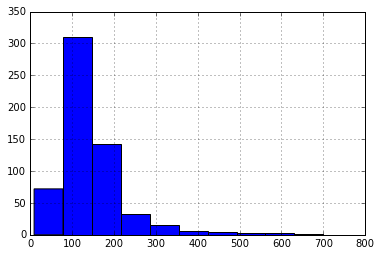

In [6]:
%matplotlib inline
# Plot histogram for variable LoanAmount
train['LoanAmount'].hist()

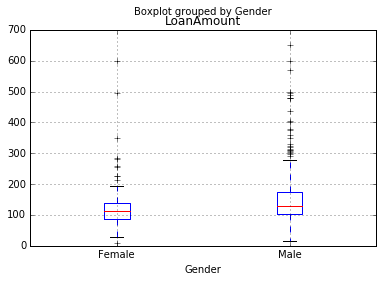

In [7]:
# Plot a box plot for variable LoanAmount by variable Gender of training data set
train.boxplot(column='LoanAmount', by = 'Gender')

# Understanding distribution of categorical variables

In [8]:
# Loan approval rates in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']
print "%d number of loans were approved." %loan_approval

422 number of loans were approved.


In [9]:
# Two-way comparison: Credit History and Loan Status
pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,192,422,614


In [10]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
 return ser/float(ser[-1])

# Two-way comparison: Loan approval rate for customers having Credit_History (1)
df=pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = df['Y'][1]
print "%f percent of the applicants whose loans were approved have Credit_History equals to 1." %(loan_approval_with_Credit_1*100) 

79.578947 percent of the applicants whose loans were approved have Credit_History equals to 1.


In [11]:
df['Y']

Credit_History
0.0    0.078652
1.0    0.795789
All    0.687296
Name: Y, dtype: float64

# Dealing with missing values

In [12]:
# Number of variables with missing values
variables_missing_value = train.isnull().sum()
variables_missing_value 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Impute missing value of Loan_Amount_Term with median
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

In [14]:
# Impute missing value of Self_Employed with more frequent category
train['Self_Employed'].fillna('No',inplace=True)

# Treat Outliers of LoanAmount and Applicant Income

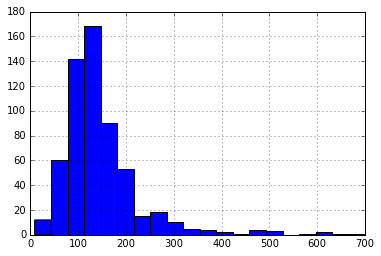

In [15]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
train['LoanAmount'].hist(bins=20)

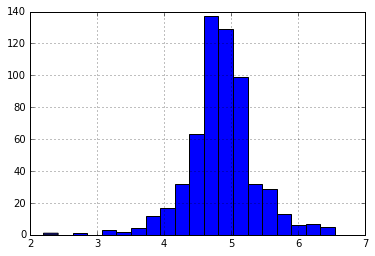

In [16]:
import numpy as np
# Perform log transformation of TotalIncome to make it closer to normal
train['LoanAmount_log'] = np.log(train['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
train['LoanAmount_log'].hist(bins=20)

# Data Preparation for Model Building

In [18]:
from sklearn import preprocessing

# Impute missing values for Gender
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat_col=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for var in cat_col:
    le = preprocessing.LabelEncoder()
    train[var]=le.fit_transform(train[var].astype('str'))

In [30]:
train['Credit_History'].isnull().sum()

50

In [33]:
LoanAmount_have_missing_value = train['LoanAmount'].isnull().sum() > 0

In [34]:
LoanAmount_have_missing_value

True

In [11]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
# Impute missing value of LoanAmount with 168
train['LoanAmount'].fillna(168, inplace=True)

# Impute missing value of LoanAmount with median
#train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [52]:
train['LoanAmount'].median()

129.0

In [6]:
train['Gender'].fillna('Male',inplace=True)

In [9]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
train['Credit_History'].fillna(1,inplace=True)